# Lab 3: Logistic Regression

In this practice session, you are invited to train a logistic regression classifier using gradient descent method in a first time then a python optimization function. First, you will work on simulated data. After that, your classifier will predict if student will be admitted or not given his score in two main exams. 

In [1]:
#def cost_func2()

# def grad_cost_func2 = grad_cost_func(theta[:, np.newaxis], X,Y)
# g.shape(g.shape[0],)
# return g


# best alpha : 0.003

# https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed

<h2>Preparation</h2>

We'll need the following libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import*
from matplotlib import cm
from matplotlib.patches import Rectangle
from scipy.optimize import fmin_bfgs

The class <code>plot_error_surfaces</code> is just to help you visualize the data space

In [3]:
# Create class for plotting and the function for plotting

class plot_error_surfaces(object):
    
    # Construstor
    def __init__(self, w_range, b_range, X, Y, cost_fn, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y
        self.x = X
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                if (cost_fn=='MSE'):
                    Z[count1, count2] = np.mean((self.y - (1 / (1 + np.exp(-1*w2 * self.x - b2)))) ** 2)
                else:
                    yhat= 1 / (1 + np.exp(-1*(w2*self.x+b2)))
                    Z[count1,count2]=-1*np.mean(self.y*np.log(yhat+1e-16) +(1-self.y)*np.log(1-yhat+1e-16))
                count2 += 1   
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
     # Setter
    def set_para_loss(self, w,b, loss):
        self.n = self.n + 1
        self.W.append(w)
        self.B.append(b)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.plot(self.x, 1 / (1 + np.exp(-1 * (self.W[-1] * self.x + self.B[-1]))), label = 'sigmoid')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-0.1, 2))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.show()
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        
# Plot the diagram

def PlotStuff(X, Y, model, epoch, leg = True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label = 'epoch ' + str(epoch))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    if leg == True:
        plt.legend()
    else:
        pass

## Part 1: Simulated Data

<h2 id="Makeup_Data">Create Some Data</h2>

**Question 1:**
- Use [<code>numpy.arange</code>](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html) to generate values from -1 to 1 with a step of 0.1 in the variable X. 
- Use [<code>numpy.zeros</code>](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.zeros.html) to generate an array of zeros having the same shape of X in the variable Y.

In [4]:
# Type your code here
X = np.arange(-1,1,0.1,dtype = float)
X = X =X[:,np.newaxis]      # we add np.newaxis in the indexing to obtain an array of shape (m,1) instead of (m,1)
# Type your code here
X

array([[-1.00000000e+00],
       [-9.00000000e-01],
       [-8.00000000e-01],
       [-7.00000000e-01],
       [-6.00000000e-01],
       [-5.00000000e-01],
       [-4.00000000e-01],
       [-3.00000000e-01],
       [-2.00000000e-01],
       [-1.00000000e-01],
       [-2.22044605e-16],
       [ 1.00000000e-01],
       [ 2.00000000e-01],
       [ 3.00000000e-01],
       [ 4.00000000e-01],
       [ 5.00000000e-01],
       [ 6.00000000e-01],
       [ 7.00000000e-01],
       [ 8.00000000e-01],
       [ 9.00000000e-01]])

In [5]:
X.shape

(20, 1)

In [6]:
Y = np.zeros(X.shape)
Y[X[:, 0] > 0.2] = 1 #for all Xi where Xi > 0.2, we replace the value Yi by 1
Y.shape

(20, 1)

<font color="blue">
Note : <br>
At this state, we have :
- X an array of shape (20,1), with number from -1 to 1 with a step of 0.1 ;
- Y an array with the same shape as X filled with 0.

For all the X[i] > 0.2, we replace Y[i] by 1.


Let us plot the generated data.

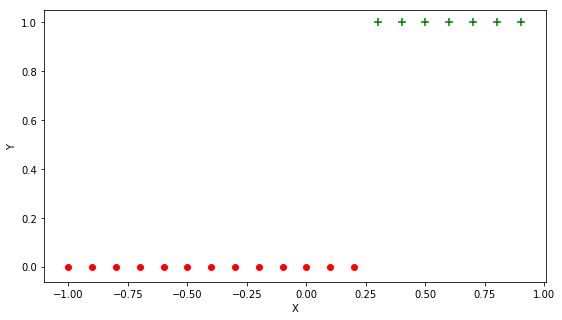

In [7]:
plt.figure("Visualize Data",figsize=(9,5))
plt.scatter(X[Y==0], Y[Y==0],  color='red')
plt.scatter(X[Y==1], Y[Y==1],  color='green',marker='+',s=80)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**Question 2: **
- Build the matrix X with shape (m,2) that represents 2 features: a column of ones that represents the bias term and a column of the generated data.  
**Hint:** You can use numpy [concatenate](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html) function (put two columns or array together).

In [8]:
# Type your code here

# uns = np.ones((Y.shape)) # On peut aussi utiliser np.full((2, 2), np.inf)
# X = np.append(X, uns, axis=1)
# X

uns = np.ones((Y.shape))
X = np.concatenate((uns,X), axis=1)

#np.concatenate((X, uns), axis=1)
uns.shape

(20, 1)

In [9]:
X

array([[ 1.00000000e+00, -1.00000000e+00],
       [ 1.00000000e+00, -9.00000000e-01],
       [ 1.00000000e+00, -8.00000000e-01],
       [ 1.00000000e+00, -7.00000000e-01],
       [ 1.00000000e+00, -6.00000000e-01],
       [ 1.00000000e+00, -5.00000000e-01],
       [ 1.00000000e+00, -4.00000000e-01],
       [ 1.00000000e+00, -3.00000000e-01],
       [ 1.00000000e+00, -2.00000000e-01],
       [ 1.00000000e+00, -1.00000000e-01],
       [ 1.00000000e+00, -2.22044605e-16],
       [ 1.00000000e+00,  1.00000000e-01],
       [ 1.00000000e+00,  2.00000000e-01],
       [ 1.00000000e+00,  3.00000000e-01],
       [ 1.00000000e+00,  4.00000000e-01],
       [ 1.00000000e+00,  5.00000000e-01],
       [ 1.00000000e+00,  6.00000000e-01],
       [ 1.00000000e+00,  7.00000000e-01],
       [ 1.00000000e+00,  8.00000000e-01],
       [ 1.00000000e+00,  9.00000000e-01]])

<h2 id="Model_Cost">Create the Model and Cost Function</h2>

**Question 3: **  
- Create a sigmoid function that returns $sigmoid(z)=\frac{1}{1+e^{-z}}$  
**Hint:** For a vectorized implementation:
- Use [<code>numpy.ones</code>](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ones.html) to have a numerator with the same shape of z
- Use [<code>numpy.exp</code>](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)

In [10]:
def sigmoid(z):
    # Type your code here
    sig = 1 /(np.ones(z.shape) + np.exp(-z)) # /!\ : not 1/(1 + np.exp(-z)) because 1 is a scalar and z a matrix
    return sig

<font color="green">
Note : <br>
**1** + np.exp(-z)) -> Error because 1 is a scalar and z a matrix



Plot the sigmoid function:

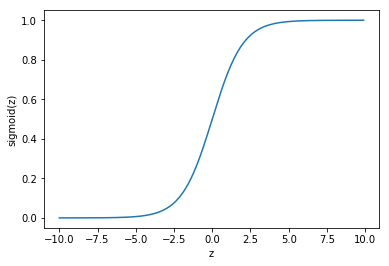

In [11]:
z=np.arange(-10, 10, 0.1).reshape(-1, 1)
plt.plot(z, sigmoid(z))
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.show()

<font color="green">
With the sigmoid function, we can "represent" logistic regression. Both classes (0 and 1) are the asymptotic limits of the sigmoid function. 
- 0 : -inf limit
- 1 : +inf limit

**Question 4: **
- Create your logistic regression predict function
$$yhat=sigmoid(\theta^\top x)=\frac{1}{1+e^{-\theta^\top x}}$$
**Hint:** Use the sigmoid function  
This new hypothesis formulas will ensure: $0\leq yhat_i\leq 1$  

In [12]:
# Create predict function
def predict(x,theta):
    # Type your code here
    #yhat = sigmoid(np.dot(np.transpose(theta),x))
    yhat = sigmoid(np.dot(x,theta)) # /!\ matrix multiplication
    #print("x.shape",x.shape)
    #print("theta.shape",theta.shape)
    return  yhat

**Question 5:** 
- Store in the variable m the number of samples.
- Define the criterion or cost function that returns the MSE (Mean Square Error):  
**Mean Squared Error (MSE)**: $cost = \frac{1}{2~m} \sum_{i=1}^{m}{(yhat_i - y_i)^2}$

In [13]:
# Create the MSE function to evaluate the result.

def MSE_cost(yhat, y):
    
    # Type your code here
    m = y.shape[0]
    error = (yhat - y)**2
    cost = (1/2*m)* np.sum(error)
    
    return cost

Create a <code> plot_error_surfaces</code> object to visualize the loss when we use the MSE cost

<Figure size 432x288 with 0 Axes>

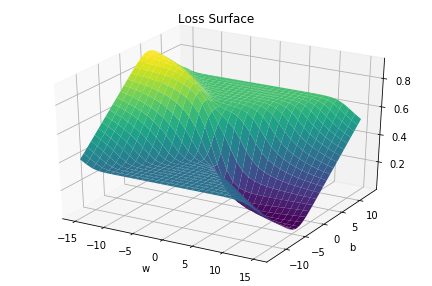

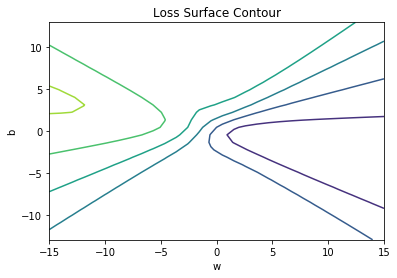

In [14]:
get_surface1 = plot_error_surfaces(15, 13, X[:,1,np.newaxis], Y,'MSE', 30)

As we can see on the loss surface contour of the MSE, we can't find an optimal theta, that is why we will not use the MSE. We can't use it to build our training model

**Question 6:** 
- Store in the variable m the number of samples.
- Define the criterion or cost function that returns the NLL (Negative Log Likelihood Error):  
**Negative Log Likelihood Error (NLL)**: $$cost=J(\theta)=\frac{-1}{m}\sum_{i=1}^{m}\left [y\times log(yhat)+(1-y)\times log(1-yhat)\right ]$$
**Hint:** For a vectorized implementation:
- Use [<code>numpy.sum</code>](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.sum.html) and [<code>numpy.log</code>](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html)

In [15]:
def NLL_cost(yhat, y):
    # Type your code here
    m = y.shape[0] # nf of samples
    to_sum = y*np.log(yhat)+(1-y)*np.log(1-yhat)
    J = (-1/m)*(np.sum(to_sum))
    return  J

Create a <code> plot_error_surfaces</code> object to visualize the loss when we use the NLL cost

<Figure size 432x288 with 0 Axes>

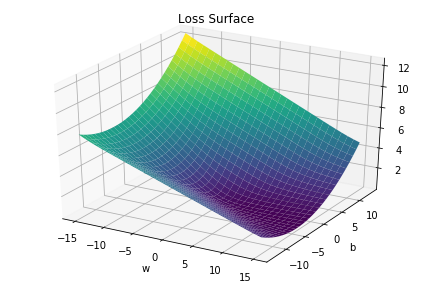

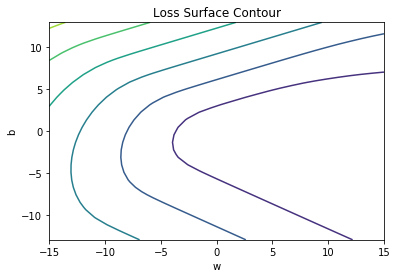

In [16]:
get_surface = plot_error_surfaces(15, 13, X[:,1,np.newaxis], Y,'NLL', 30)
#plt.show()

In this cost function, there is only 1 minimum, the function can by minimized. We are going to use the NLL to build our training model.

**Question 7:** 
The gradient vector of the logistic cost function is calculated as following: $$\nabla J(\theta) = \begin{bmatrix}\frac{\partial J(\theta)}{\partial \theta_0}
\\ \frac{\partial J(\theta)}{\partial \theta_1}
\\ \vdots
\\ \frac{\partial J(\theta)}{\partial \theta_{n-1}}
\end{bmatrix}$$ 
where: $\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m}{(yhat_i - y_i)~x_{ij}} ~~for~ j=0\dots n-1$
- Implement the "grad_cost_func" function that evaluates the gradient of logistic cost function.  
**Hint:** You can use the vectorized form: $\nabla J(\theta) =\frac{1}{m} x^T(yhat-y)$

In [17]:
def grad_cost_func(theta, x, y):
    # Type your code here
    m = y.shape[0]
    g = 1/m*np.dot(np.transpose(x), predict(x,theta)-y)  
    #g = 1/m*np.dot(ntranspose(x), predict(x,theta)-y)   
    return g

Let us define the learning rate <code>lr</code>:  

In [18]:
lr = 2

Now, we initialize the model parameter to learn.

In [19]:
theta_init=np.array([[0.0],[0.0]],dtype=float)

#### Gradient descent algorithm
The gradient descent algorithm is a downhill iterative optimization method that uses the gradient direction as descending direction on each step to reach a local minimum. For a convex function, such as the NLL cost function, the gradient descent is guaranteed to reach a global minimum.  
The update equation of the optimization parameter $\theta_j$ is given by: $$\theta_j=\theta_j-lr \frac{\partial cost(\theta_j)}{\partial \theta_j} ~~for~ j=0\dots n-1$$
Where $lr:$ represents the step or the learning rate.

**Question 8:** Define a function for training the model by the gradient descent method using the following steps:
- Make a prediction of your data
- Calculate the loss 
- Compute the gradient of the loss
- Update the $\theta$ parameters using the formula above.

In [20]:
# Train the model

def train_model(theta,iter):
    LOSS=[]
    for epoch in range (iter):
        
        # make the prediction
        # Type your code here
        Yhat = predict(X, theta)
        
        # calculate the cost
        # Type your code here
        loss = NLL_cost(Yhat, Y)
        
        # store the loss into list
        LOSS.append(loss)
        
        get_surface.set_para_loss(theta[1],theta[0], LOSS)
        
        # Compute gradient of the loss
        # Type your code here
        grad = grad_cost_func(theta, X,Y)
        
        
        # update the theta_1 parameter
        # Type your code here
        theta = theta - lr*grad
        
        if iter % 20 == 0:
            get_surface.plot_ps()
        
    return theta, LOSS

Let's run iterations of gradient descent and determine the optimal prediction of $\theta$

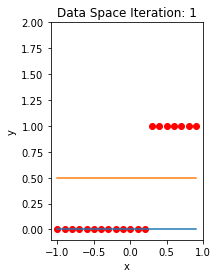

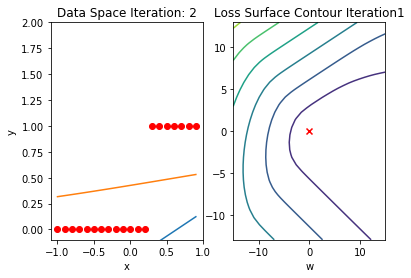

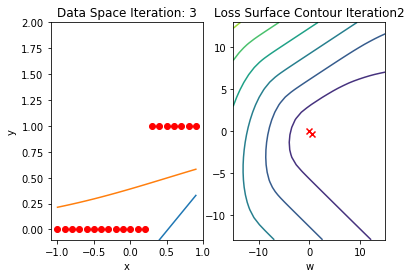

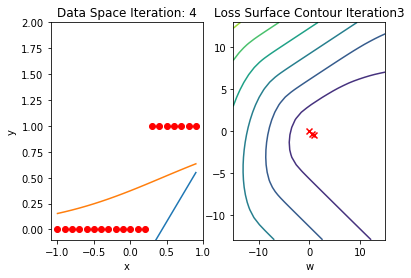

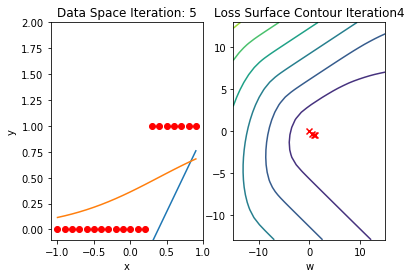

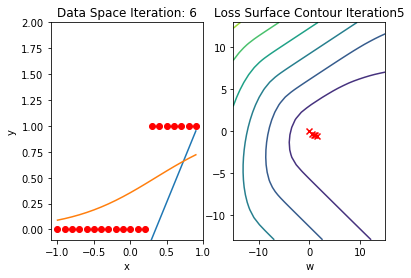

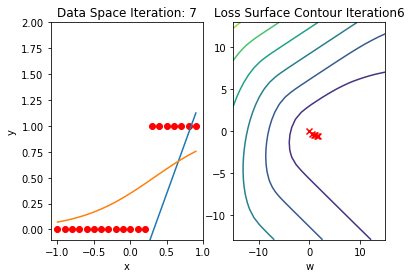

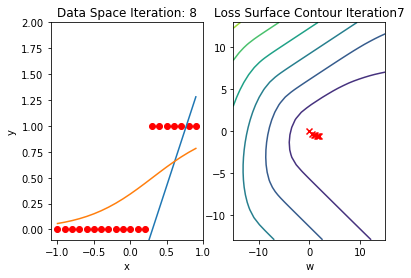

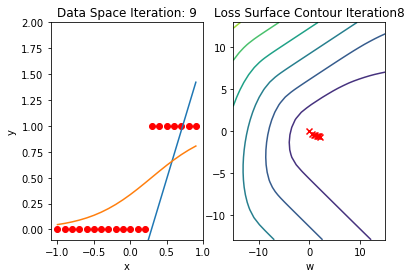

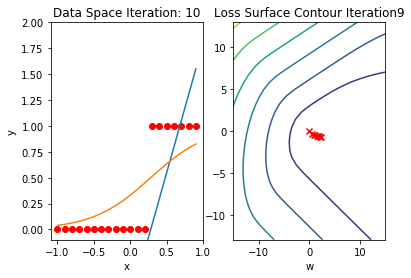

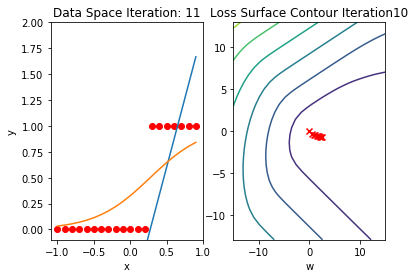

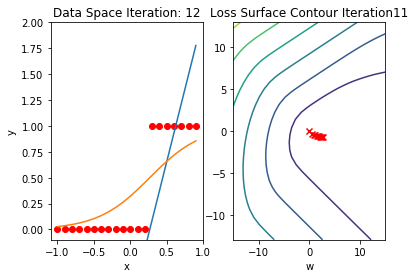

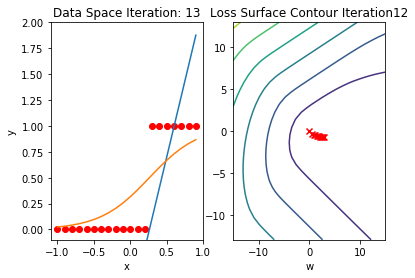

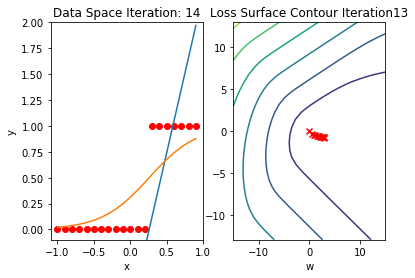

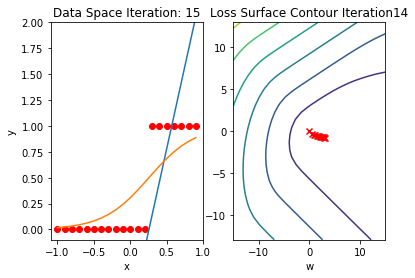

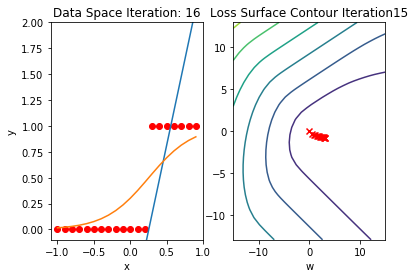

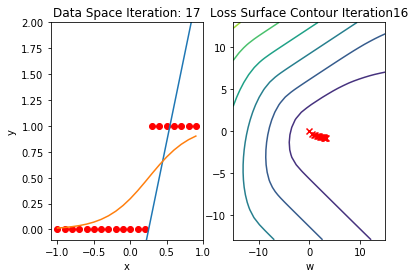

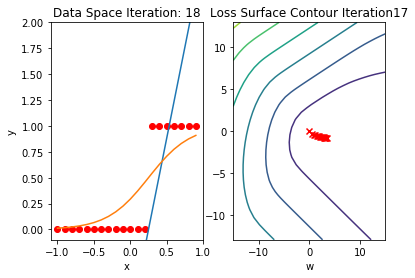

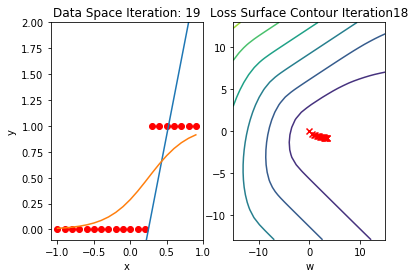

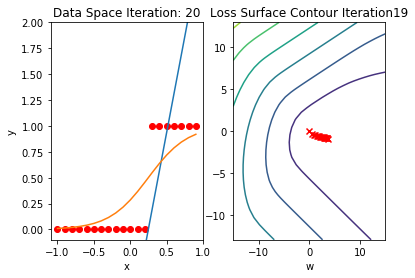

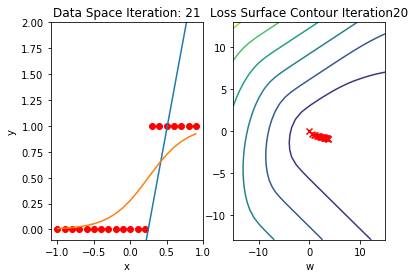

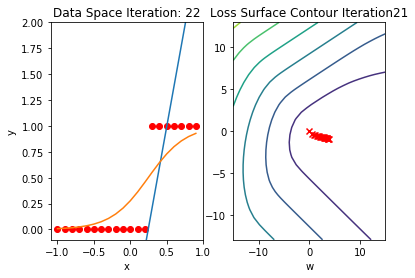

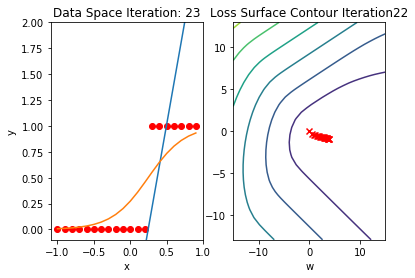

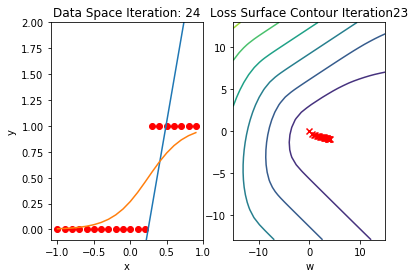

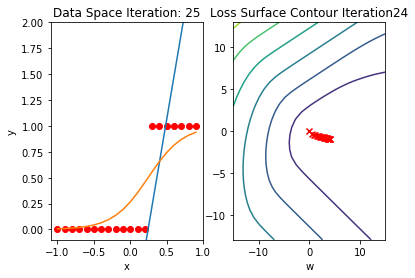

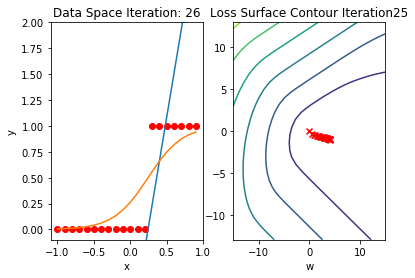

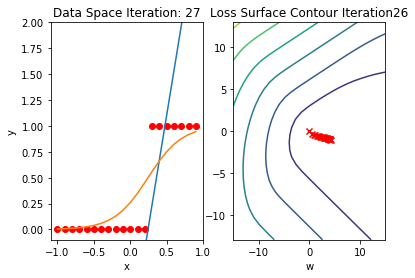

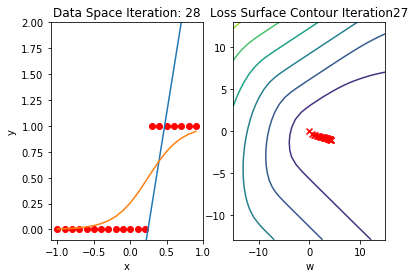

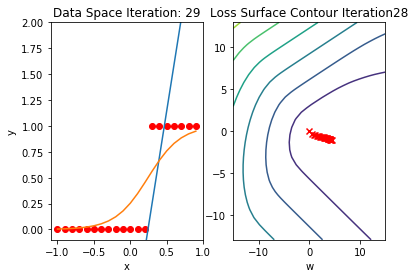

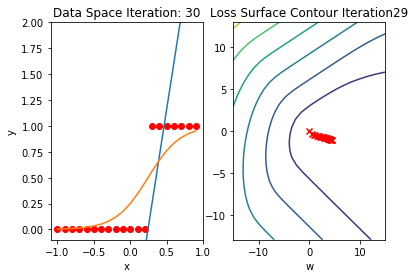

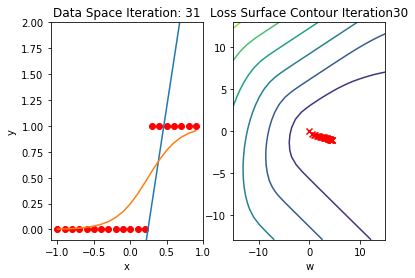

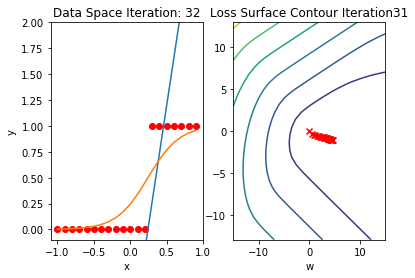

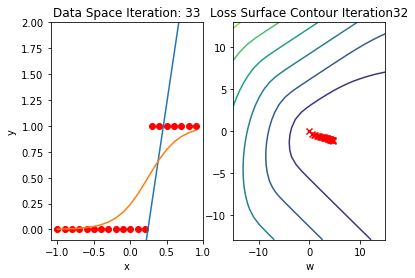

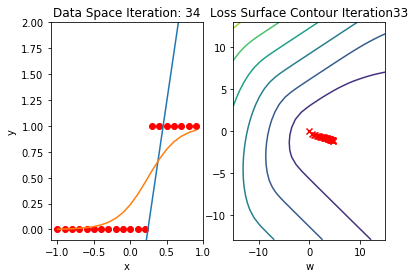

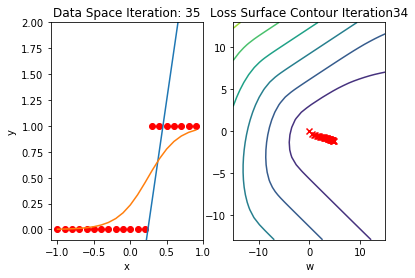

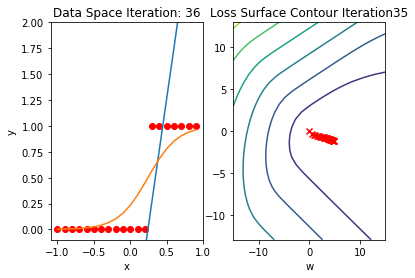

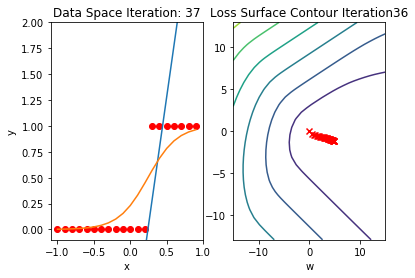

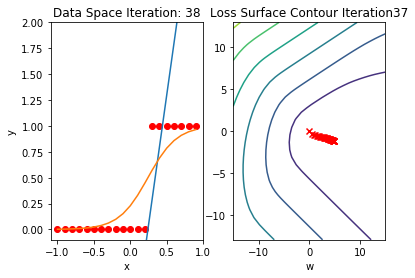

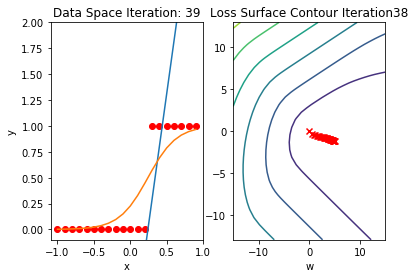

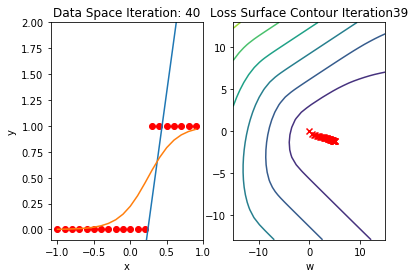

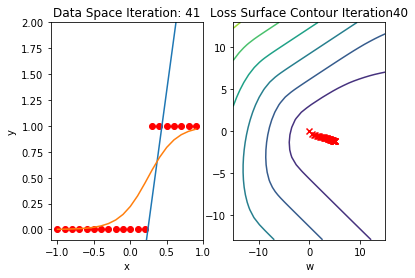

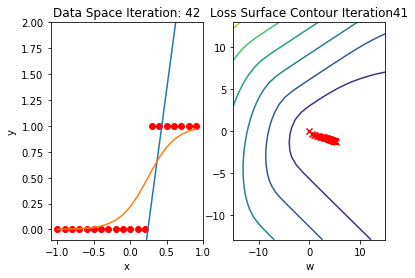

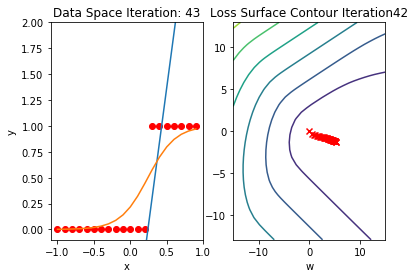

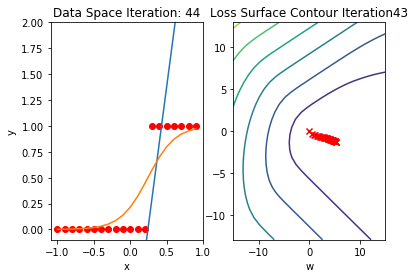

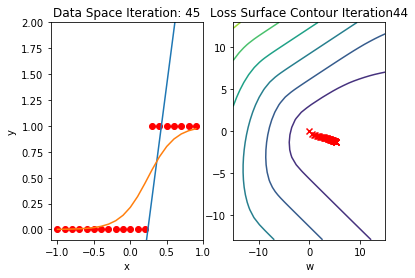

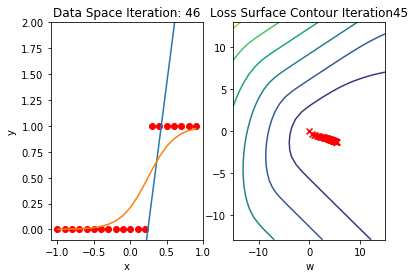

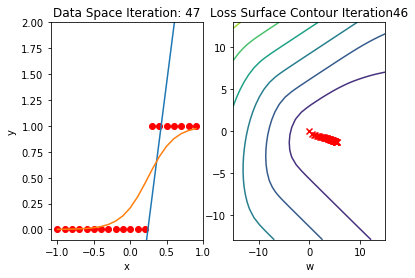

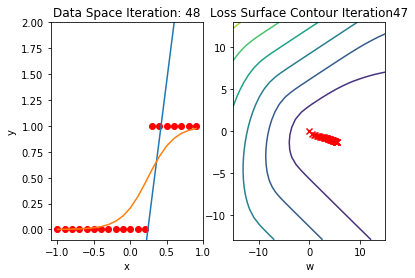

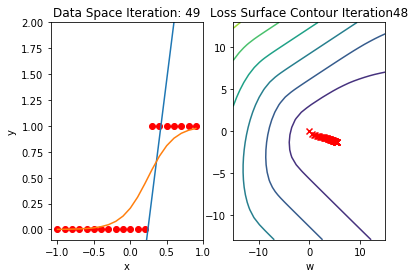

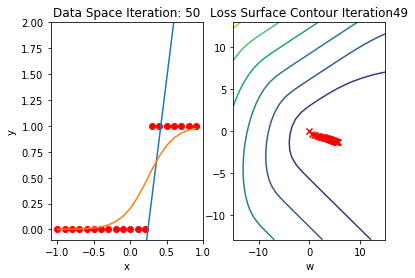

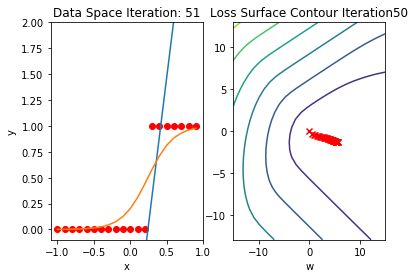

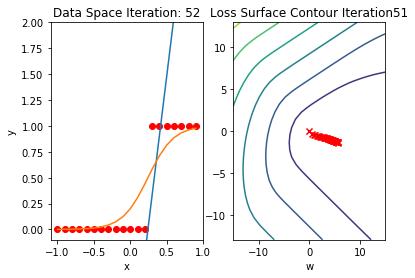

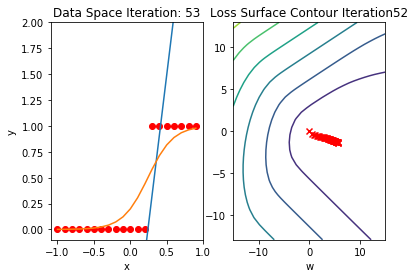

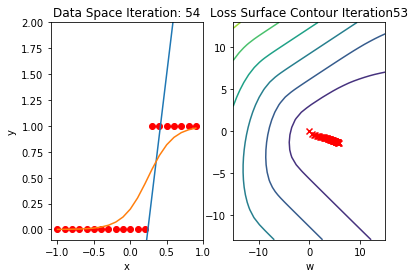

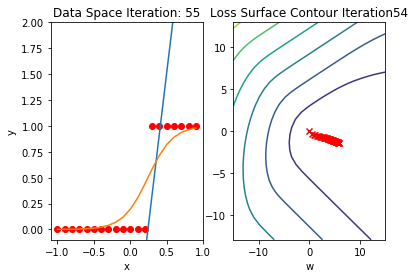

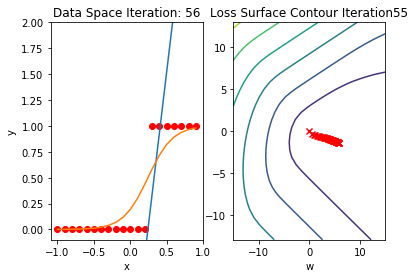

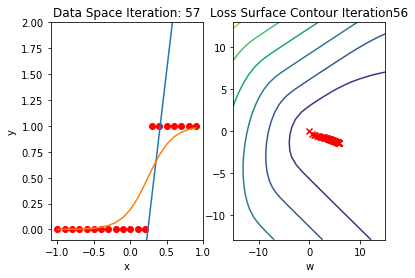

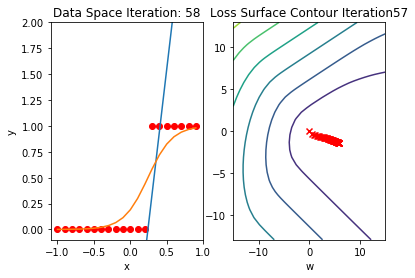

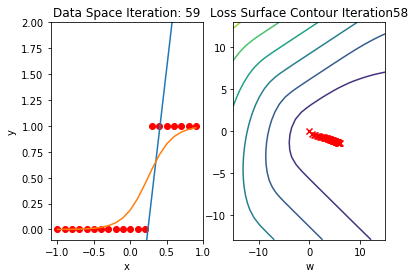

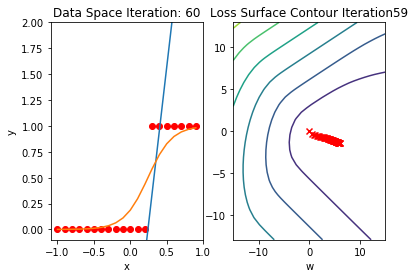

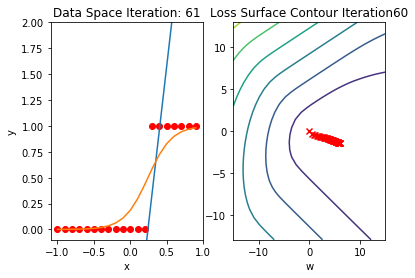

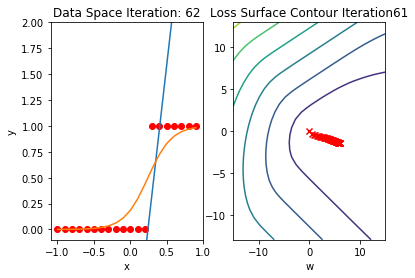

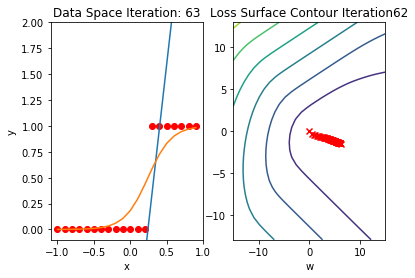

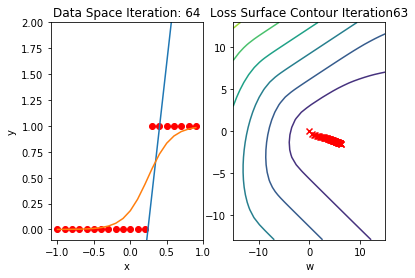

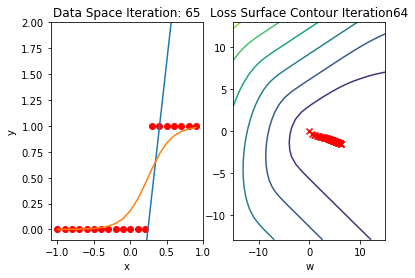

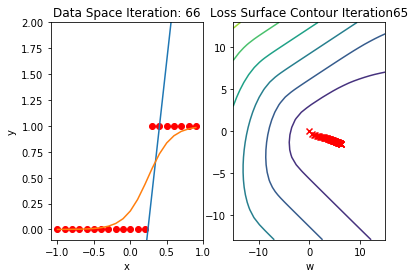

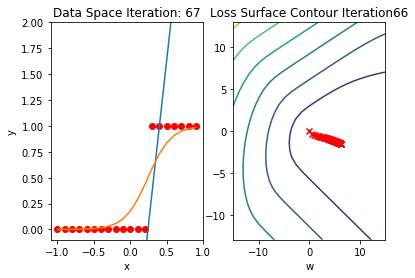

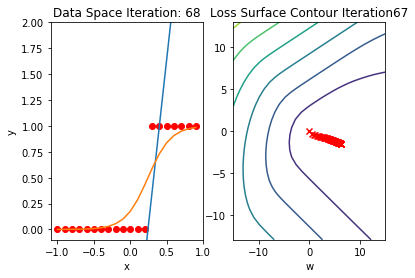

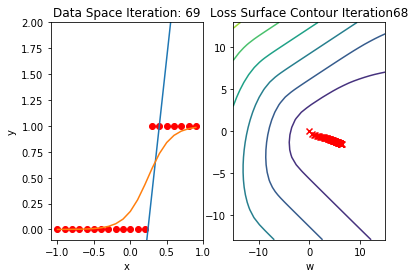

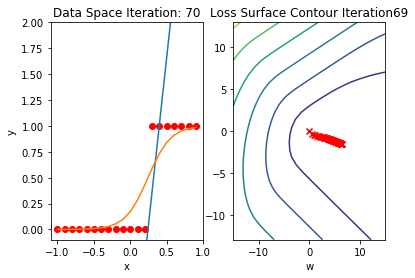

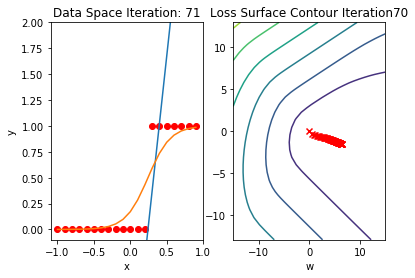

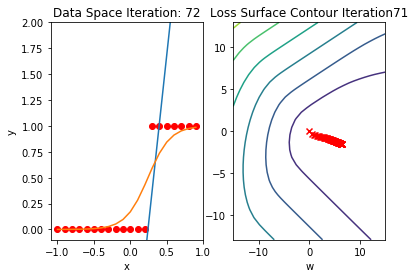

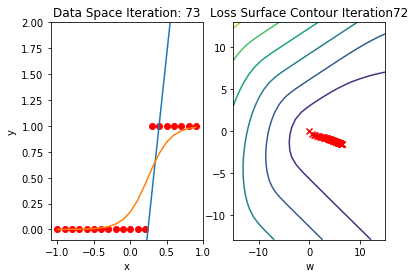

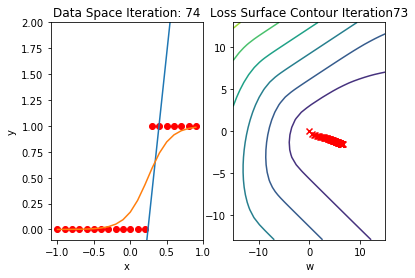

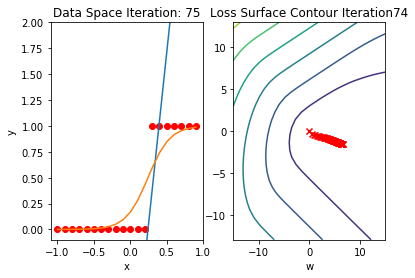

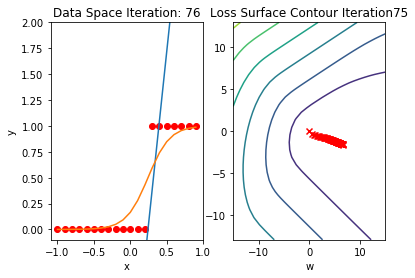

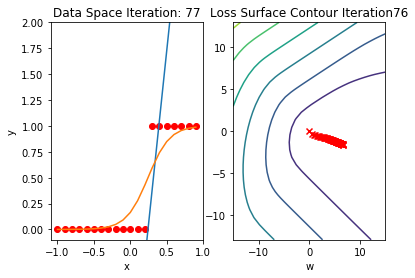

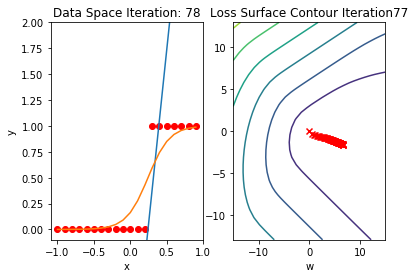

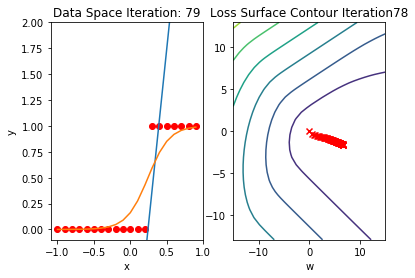

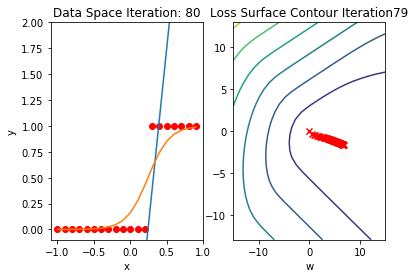

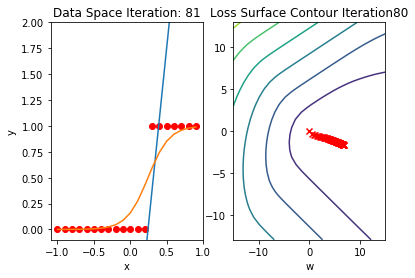

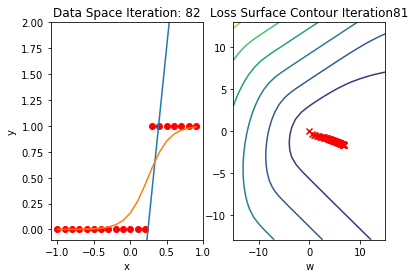

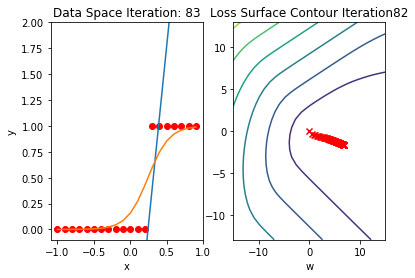

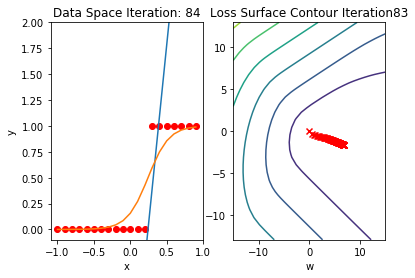

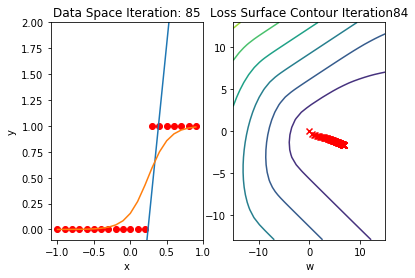

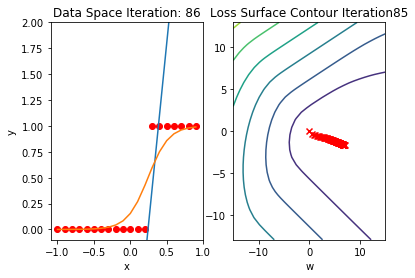

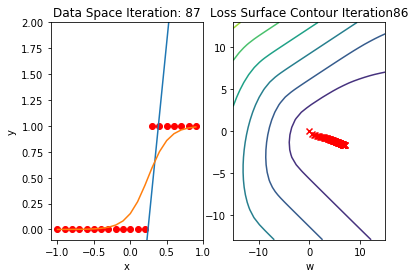

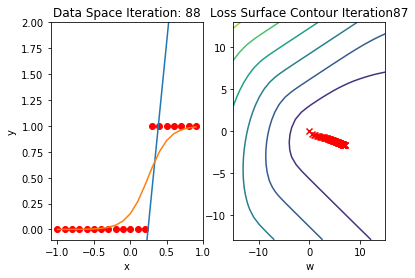

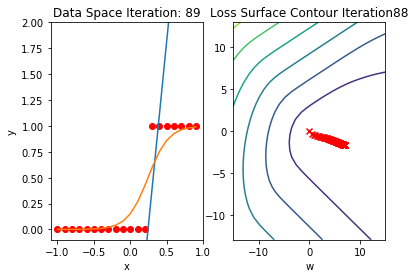

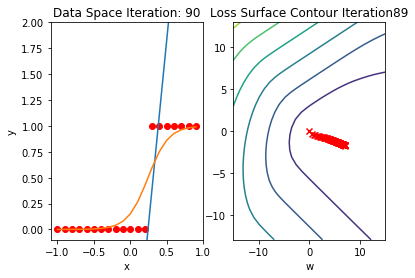

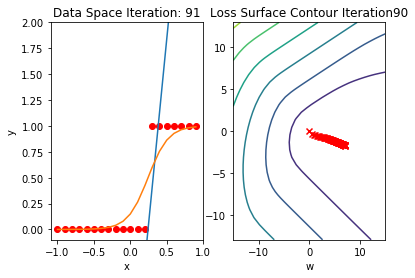

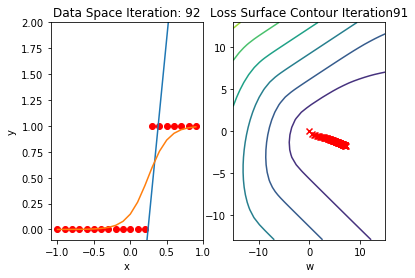

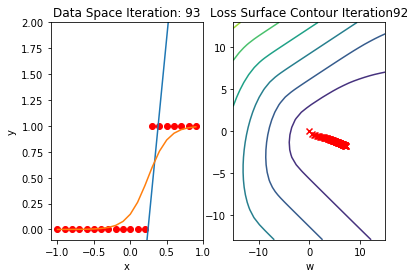

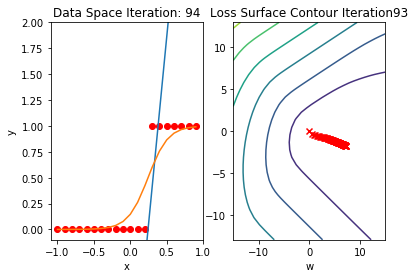

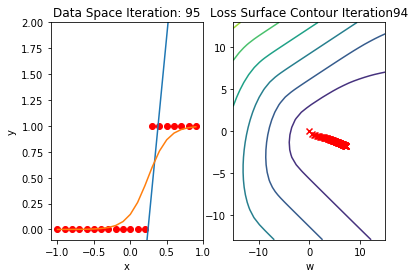

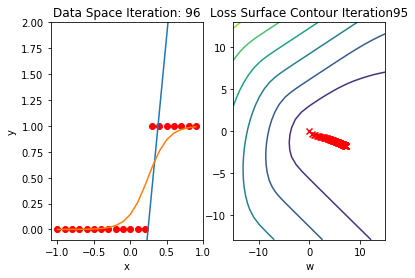

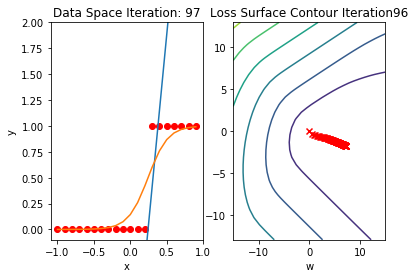

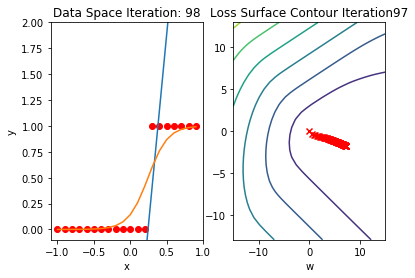

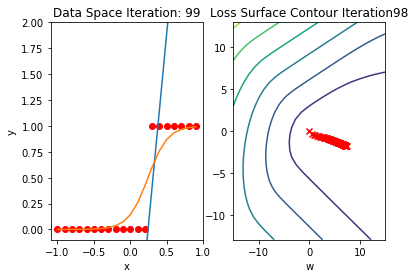

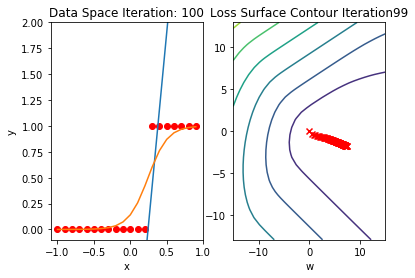

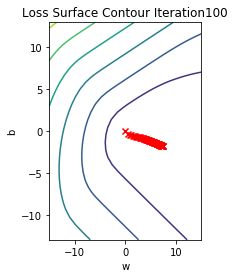

In [21]:
theta_opt, LOSS = train_model(theta_init,100)

We have to separate the data - we use logistic regression.

2 parameters : bias and X


Let's plot the loss

Text(27.125, 0.5, 'Cost')

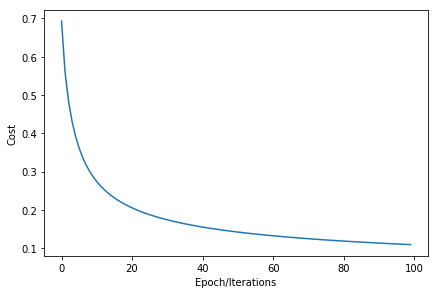

In [22]:
# Plot the variation of loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

By using the gradient descent algorithm and minimizing the cost function, we were able to separate both classes.

Through the different iteration, we can see that the gradient function is becoming more and more vertical and the sigmoid function is taking form : at the end, we have successfully separated both classes. 

### Part 2: Student scores dataset
#### Load data

**Question 1: ** The *"exams.txt"* file contains 3 columns that represent the exam 1, exam 2 scores and the result of 100 students (0: Not admitted, 1: Admitted).
- Open this file with a file editor to understand more the data. 
- Load the data in "students_results" variable and check its shape.  
**Hint:** You could use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library.

bias and 2 features
alpha : choose the one that minimize faster the cost

In [23]:
# Type your code here
students_results = np.loadtxt("exams.txt")

# Type your code here 
print('The shape of the data is',students_results.shape)

students_results

The shape of the data is (100, 3)


array([[ 6.92, 15.6 ,  0.  ],
       [ 6.06,  8.78,  0.  ],
       [ 7.17, 14.58,  0.  ],
       [12.04, 17.26,  1.  ],
       [15.81, 15.07,  1.  ],
       [ 9.02, 11.26,  0.  ],
       [12.22, 19.3 ,  1.  ],
       [15.  ,  9.31,  1.  ],
       [15.22, 17.48,  1.  ],
       [16.89,  8.71,  1.  ],
       [19.17,  7.65,  0.  ],
       [15.  ,  6.12,  0.  ],
       [16.46, 15.3 ,  1.  ],
       [13.87, 19.54,  1.  ],
       [ 7.91, 15.21,  0.  ],
       [10.79, 17.84,  1.  ],
       [13.81, 10.55,  1.  ],
       [13.59,  9.34,  0.  ],
       [14.13, 18.59,  1.  ],
       [15.4 ,  9.52,  1.  ],
       [13.47,  8.57,  0.  ],
       [17.94, 13.16,  1.  ],
       [10.11,  9.77,  0.  ],
       [ 6.84,  8.84,  0.  ],
       [15.58, 13.79,  1.  ],
       [12.45, 13.99,  1.  ],
       [16.04,  8.96,  1.  ],
       [18.62,  7.76,  0.  ],
       [12.37, 10.05,  0.  ],
       [ 7.76, 13.  ,  0.  ],
       [12.28, 14.56,  1.  ],
       [17.08, 11.41,  1.  ],
       [10.42, 12.63,  0.  ],
       [10

#### Extract and visualize features
**Question 2:** 
- Determine the number of student "m" from the input data "students_results".
- Extract exam 1, exam 2 scores and the result columns respectively in "x_1", "x_2" and "Y".  
**Hint:** The shape of "x_1", "x_2" and "Y" arrays should be (m,1) for the following questions and not (m,). You could use [newaxis numpy](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#basic-slicing-and-indexing) object to add a new axis of length one.
- Build the matrix X with shape (m,3) that represents 3 features: a column of ones that represents the bias term, a column of x_1 and a column of x_2. 
- Determine the number of features "n" (number of columns of array "X").

**Note:** The two exams score have the same scale [0,20]. Thus, we don't need to do feature normalization.

In [24]:
# Type your code here 
m = students_results.shape[0]           # number of student

# Type your code here 
x_1 = students_results[:,0, np.newaxis] # we add np.newaxis in the indexing to obtain an array 
x_2 = students_results[:,1, np.newaxis] # with shape (100,1) instead of (100,)
Y   = students_results[:,2, np.newaxis]

uns = np.ones(m)
uns = uns[:,np.newaxis]
print(uns.shape)

X = np.concatenate((x_2,x_1), axis=1)
X = np.concatenate((uns,X), axis=1)

# Type your code here 
n = students_results.shape[1]-1                # number of features
# Type your code here 
#Y =                     # we add np.newaxis in the indexing to obtain an array with shape (100,1) instead of (100,)
#x_2.shape
Y.shape

(100, 1)


(100, 1)

In [25]:
# Type your code here 
m = students_results.shape[0]              # number of student

# Type your code here 
x_1 = students_results[:,0]                                 # we add np.newaxis in the indexing to obtain an array 
x_1 = x_1[:,np.newaxis]
x_2 = students_results[:,1]                                 # with shape (100,1) instead of (100,)
x_2 = x_2[:,np.newaxis]
ones = np.ones(students_results.shape[0])
ones = ones[:,np.newaxis]
X = np.concatenate((x_2,x_1), axis=1)
print(ones.shape)
X = np.concatenate((ones,X), axis=1)

# Type your code here 
n =  students_results.shape[1]-1  # number of features
# Type your code here 
Y =  students_results[:,2]    # we add np.newaxis in the indexing to obtain an array with shape (100,1) instead of (100,)
Y = Y[:, np.newaxis]
print(Y.shape)
students_results.shape[1]

(100, 1)
(100, 1)


3

Let's visualize the features

In [26]:
%matplotlib notebook
# visualize data
plt.figure("Visualize students results",figsize=(9,5))
plt.scatter(x_1[Y==0], x_2[Y==0],  color='red',label='fail')
plt.scatter(x_1[Y==1], x_2[Y==1],  color='green',marker='+',s=80, label='success')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Adimitted/Not admitted Students')
legend = plt.legend(loc='lower left', shadow=True, fontsize='x-large')

<IPython.core.display.Javascript object>

<font color="red">
We can't draw a line that clearly separate the red and green points.

Let us define the learning rate <code>lr</code>:  

In [27]:
lr = 0.01

Now, we initialize the model parameter to learn.

In [28]:
theta_init=np.array([[0],[0],[0]],dtype=float)

**Question 3:** Evaluate the MSE cost function at theta_init

In [29]:
# Type your code here 
cost = MSE_cost(predict(X, theta_init), Y)
print("MSE cost function for theta_init is",cost)

MSE cost function for theta_init is 1250.0


Let's visualize the loss when we use the MSE cost

In [30]:
theta_1 = np.linspace(-5,5,50) # you could also use: theta_1 = np.arange(100, 300, 2)
theta_2 = np.linspace(-5,5,50)    # you could also use: theta_2 = np.arange(-1, 5, 0.05)
theta_1, theta_2 = np.meshgrid(theta_1, theta_2)
Theta=np.concatenate((np.zeros((*theta_1.shape,1)),theta_1[:,:,np.newaxis],theta_2[:,:,np.newaxis]),axis=-1)

Thetabis=Theta.reshape((Theta.shape[0]*Theta.shape[1],Theta.shape[2]))
#Zbis =  cost(Thetabis.transpose())
#Z=Zbis.reshape((Theta.shape[0],Theta.shape[1]))
Z =  1/(2*m)*np.sum((sigmoid(np.dot(Theta,X.transpose()))-np.tile(Y[np.newaxis,np.newaxis,:,0],(*theta_1.shape,1)))**2,axis=-1)

print("Minimum value of MSE cost function detected on the plot: ",np.min(Z))
print("Value of theta_1, theta_2 that minimize the MSE cost function: ",theta_1[np.argmin(np.min(Z,axis=1)),np.argmin(np.min(Z,axis=0))],theta_2[np.argmin(np.min(Z,axis=1)),np.argmin(np.min(Z,axis=0))])


# the contour plot (projection of 3d plot on 2d plan)
fig=plt.figure('Contour and Surface Plots for MSE cost function',figsize=(9,4))
ax = fig.add_subplot(1, 2, 1)
ctr = plt.contour(theta_1, theta_2, Z)
plt.clabel(ctr, inline=1, fontsize=10)
#ax.imshow(Z,cmap=cm.coolwarm)
ax.set_title('Contour Plot')
ax.set_xlabel('theta_1')
ax.set_ylabel('theta_2')

# the surface plot (3d plot)
ax=fig.add_subplot(1, 2, 2,projection='3d')
ax.plot_surface(theta_1,theta_2,Z,rstride=1,cstride=1,cmap=cm.coolwarm,linewidth=1,antialiased=True)

ax.set_title('Surface Polt')
ax.set_xlabel('theta_1')
ax.set_ylabel('theta_2')
ax.set_zlabel('Cost Funtion')

Minimum value of MSE cost function detected on the plot:  0.13000786172948764
Value of theta_1, theta_2 that minimize the MSE cost function:  -0.1020408163265305 0.1020408163265305


<IPython.core.display.Javascript object>

Text(0.5, 0, 'Cost Funtion')

Same observation as before. We can't use MSE as  a cost function.

**Question 4:** Evaluate the NLL cost function at theta_init

In [31]:
# Type your code here
cost = NLL_cost(predict(X, theta_init), Y)
print("NLL cost function for theta_init is ",cost)

NLL cost function for theta_init is  0.6931471805599453


Let's visualize the loss when we use the NLL cost

In [32]:
theta_1 = np.linspace(-5,5,50) # you could also use: theta_1 = np.arange(100, 300, 2)
theta_2 = np.linspace(-5,5,50)    # you could also use: theta_2 = np.arange(-1, 5, 0.05)
theta_1, theta_2 = np.meshgrid(theta_1, theta_2)
Theta=np.concatenate((np.zeros((*theta_1.shape,1)),theta_1[:,:,np.newaxis],theta_2[:,:,np.newaxis]),axis=-1)
Z=np.zeros(theta_1.shape)
for i in range(theta_1.shape[0]):
    for j in range(theta_1.shape[1]):
        for k in range(m):
            if (Y[k,0]==1):
                if (sigmoid(np.dot(Theta[i,j,:],X[k,:]))==0):
                    Z[i,j]+=100
                else:
                    Z[i,j]-=np.log(sigmoid(np.dot(Theta[i,j,:],X[k,:])))
            else:
                if (sigmoid(np.dot(Theta[i,j,:],X[k,:]))==1):
                    Z[i,j]+=100
                else:
                    Z[i,j]-=np.log(1-sigmoid(np.dot(Theta[i,j,:],X[k,:])))
Z=Z/m  

print("Minimum value of cost function detected on the plot: ",np.min(Z))
print("Value of theta_1, theta_2 that minimize the cost function: ",theta_1[np.argmin(np.min(Z,axis=1)),np.argmin(np.min(Z,axis=0))],theta_2[np.argmin(np.min(Z,axis=1)),np.argmin(np.min(Z,axis=0))])


# the contour plot (projection of 3d plot on 2d plan)
fig=plt.figure('Contour and Surface Plots Logistic cost function',figsize=(9,4))
ax = fig.add_subplot(1, 2, 1)
ctr = plt.contour(theta_1, theta_2, Z)
plt.clabel(ctr, inline=1, fontsize=10)
#ax.imshow(Z,cmap=cm.coolwarm)
ax.set_title('Contour Plot')
ax.set_xlabel('theta_1')
ax.set_ylabel('theta_2')

# the surface plot (3d plot)
ax=fig.add_subplot(1, 2, 2,projection='3d')
ax.plot_surface(theta_1,theta_2,Z,rstride=1,cstride=1,cmap=cm.coolwarm,linewidth=1,antialiased=True)
ax.set_title('Surface Polt')
ax.set_xlabel('theta_1')
ax.set_ylabel('theta_2')
ax.set_zlabel('Cost Funtion')

Minimum value of cost function detected on the plot:  0.715014741172373
Value of theta_1, theta_2 that minimize the cost function:  -0.1020408163265305 0.1020408163265305


<IPython.core.display.Javascript object>

Text(0.5, 0, 'Cost Funtion')

There is only one minimum with NLL, so we are going to use this function to build our model.

**Question 5:** Evaluate the gradient of the NLL cost function at theta_init

In [33]:
# Type your code here
grad= grad_cost_func(theta_init, X,Y)
print("Gradient for theta_init is : ", grad)

Gradient for theta_init is :  [[-0.1    ]
 [-2.2527 ]
 [-2.40185]]


**Question 6:** Define a function for training the model by the gradient descent method using the following steps:
- Make a prediction of your data
- Calculate the loss 
- Compute the gradient of the loss
- Update the $\theta$ parameters.

In [34]:
# Define a function for train the model

def train_model(theta,iter,lr=lr):
    LOSS=[]
    for epoch in range (iter):
        
        # make the prediction
        # Type your code here
        Yhat = predict(X, theta)
        
        # calculate the cost
        # Type your code here
        loss = NLL_cost(Yhat, Y)
        
        # store the loss into list
        LOSS.append(loss)
        
        # Compute gradient of the loss
        # Type your code here
        grad= grad_cost_func(theta,X,Y)
        
        # update the theta_1 parameter
        # Type your code here
        theta = theta - lr*grad
        
    return theta, LOSS

#### Selecting learning rate
Execute the following code and visualize learning curves that describe the decrease of the cost function during the gradient descent iterations.

**Question 7: ** 
- Set the learning rate "alpha" to the best value that helps to decrease quickly the cost function. 

** Note:** The execution of this block of code could take several seconds.

<IPython.core.display.Javascript object>


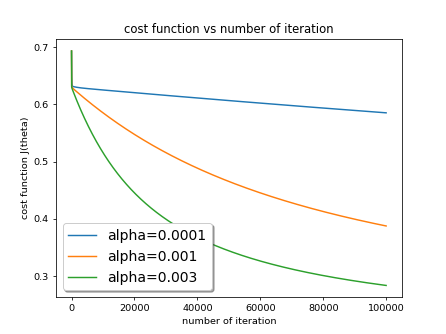

In [38]:
# calculate the optimal value of theta that minimize cost function
theta_opt1,J1=train_model(theta_init,100000,lr=0.001)
theta_opt2,J2=train_model(theta_init,100000,lr=0.003)
theta_opt3,J3=train_model(theta_init,100000,lr=0.0001)

plt.figure('Learning curves')
plt.plot(range(len(J3)),J3,label='alpha=0.0001')
plt.plot(range(len(J1)),J1,label='alpha=0.001')
plt.plot(range(len(J2)),J2,label='alpha=0.003')

plt.xlabel('number of iteration')
plt.ylabel('cost function J(theta)')
plt.title('cost function vs number of iteration')
plt.legend(loc='best', shadow=True, fontsize='x-large')

# Type your code here
best_alpha = 0.003          # set the best value of alpha

<font color='blue'>
The learning rate "alpha" to the best value that helps to decrease quickly the cost function is 0,003. With this value we minimize the cost function faster, as we can see on the curve.

**Question 8:** 
- Print the optimal value of theta that minimize cost function.
- Print the final loss.

In [39]:
# Type your code here
print("The optimal value of theta that minimize cost function is: ",theta_opt2)
print('The final loss is: ',J2[-1])

The optimal value of theta that minimize cost function is:  [[-9.24271247]
 [ 0.36595791]
 [ 0.39750755]]
The final loss is:  0.2838454878620783


**Question 9: **
- Use the optimal theta calculated to predict the result of student who has a score of 11 in exam 1 and a score of 9.5 in exam 2.  

** Note:** The execution of this block of code could take up to one minute.

In [40]:
# Type your code here
theta_opt= theta_opt2
# predict student result
exam_1 = 11
exam_2 = 9.5
result =  predict ([[1.0, exam_2, exam_1]], theta_opt)
print("The predicted result of student with {0} and {1} scores is: {2}".format(exam_1,exam_2,['Not admitted','Admitted'][int(round(result[0,0]))]))
print("With an admission probability: ",result)

The predicted result of student with 11 and 9.5 scores is: Not admitted
With an admission probability:  [[0.19884493]]


Let's plot the loss and the classifier decision boundries and data

<IPython.core.display.Javascript object>


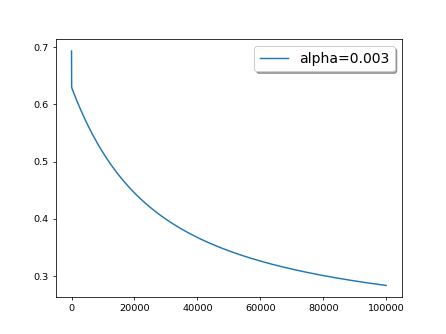

<IPython.core.display.Javascript object>


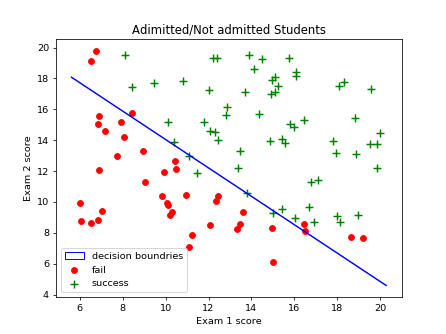

In [41]:
# plot learning curve
plt.figure('Learning curve')
plt.plot(range(len(J2)),J2,label='alpha=0.003')
plt.legend(loc='best', shadow=True, fontsize='x-large')

# plot classifier decision boundries and data 
plt.figure('decision boundries')
fail=plt.scatter(x_1[Y==0], x_2[Y==0],  color='red',label='fail')
succ=plt.scatter(x_1[Y==1], x_2[Y==1],  color='green',marker='+',s=80, label='success')
plt.plot([np.min(X[:,1])-0.5,np.max(X[:,1])+0.5],[(-theta_opt[0,0]-theta_opt[1,0]*(np.min(X[:,1])-0.5))/theta_opt[2,0],(-theta_opt[0,0]-theta_opt[1,0]*(np.max(X[:,1])+0.5))/theta_opt[2,0]],color="blue")
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Adimitted/Not admitted Students')
extra = Rectangle((0, 0), 3, 4, fc="w", fill=False, edgecolor="b", linewidth=1)
plt.legend([extra,fail,succ], ("decision boundries","fail","success"),loc='lower left')

<font color='blue'> The decision boundary is well defined but it is still making mistakes. We have a error rate of 0.28.

#### Minimize cost function with python optimization function:
We note that the gradient descent algorithm takes a lot of time and it is not suitable for optimizing complex  function like logistic cost function. Hence, we will use [fmin_bfgs](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fmin_bfgs.html) optimization function from the [scipy](https://www.scipy.org/) library in python.  

**Question 10: **
- The "fmin_bfgs" function work with theta and gradient array in form (n,) and nor (n,1). re-implement cost function ("cost_func2") and gradient function ("grad_cost_func2") that deal with this kind of arrays.
- Call "fmin_bfgs" function to calculate the optimal theta. This function take as parameters: the name of cost function ("cost_func2"), the name of gradient cost function ("grad_cost_func2") and the initial theta ("theta0").  
**Hint:** You could use [reshape](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.reshape.html) function to modify the shape of the gradient vector

Optimization terminated successfully.
         Current function value: 0.203398
         Iterations: 18
         Function evaluations: 24
         Gradient evaluations: 24
The optimal value of theta that minimize cost function is:  [-25.1725301   1.0077848   1.0316124]
Final error =  0.20339833822270467


<IPython.core.display.Javascript object>


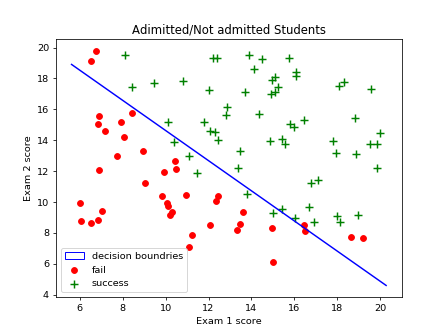

In [47]:
def cost_func2(theta):
    # Type your code here
    J= NLL_cost(predict(X,theta[:,np.newaxis]),Y)
    return J 

def grad_cost_func2(theta):
    # Type your code here
    g=grad_cost_func(theta[:,np.newaxis],X,Y)             # this is the vectorized implementation
    g.shape=(g.shape[0],) # you could also use g=np.reshape(g, (g.shape[0],))
    return g  

# calculate the optimal theta
theta0=np.array([0,0,0],dtype=float)

# Type your code here
Thopt= fmin_bfgs(cost_func2, theta0, grad_cost_func2)
print("The optimal value of theta that minimize cost function is: ",Thopt)
print("Final error = ",cost_func2(Thopt))

# plot linear model and data 
plt.figure('Linear decision boundries')
fail=plt.scatter(x_1[Y==0], x_2[Y==0],  color='red',label='fail')
succ=plt.scatter(x_1[Y==1], x_2[Y==1],  color='green',marker='+',s=80, label='success')
plt.plot([np.min(X[:,1])-0.5,np.max(X[:,1])+0.5],[(-Thopt[0]-Thopt[1]*(np.min(X[:,1])-0.5))/Thopt[2],(-Thopt[0]-Thopt[1]*(np.max(X[:,1])+0.5))/Thopt[2]],color="blue")
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Adimitted/Not admitted Students')
plt.legend([extra,fail,succ], ("decision boundries","fail","success"),loc='lower left')

<font color='blue'>
With Python optimisation function, we are doing less iterations and we have a smaller error rate : 0.28 to 0.20.

In [ ]:
a = [[1, 0], [0, 1]]
b = [[4, 1], [2, 2]]
np.dot(a, b)

In [ ]:
np.log(2)

Lab 4
